In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings # отключим предупреждения анаконды
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/water.csv', index_col=0)

### 1. Есть ли связь между жёсткостью воды и средней годовой смертностью?
- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена.
- Построить модель линейной регрессии.
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [3]:
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


In [4]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


Судя по тому что у __mortality__ средняя не далека от медианы, а максимум с минимумом равноудалены, можно предположить, что эта величина распределена нормально или близка к тому. Таких же выводов нельзя сделать для __hardness__

### Точечный график

In [5]:
x = df['mortality']
y = df['hardness']

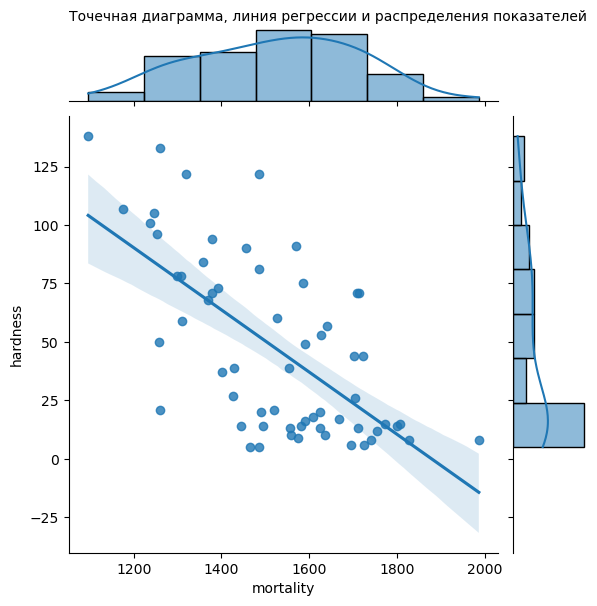

In [6]:
sns.jointplot(x=x, y=y, kind="reg")
plt.title('Точечная диаграмма, линия регрессии и распределения показателей', fontsize=10, loc='right', y=1.2)
plt.show()

Данных очень мало, тем не менее наблюдается средняя обратная взаимосвязь (НЕ ЗАВИСИМОСТЬ!)

### Коэффициенты корреляции Пирсона и Спирмена.

Действительно, распределение __hardness__ носит явно не нормальный характер и смещено к _10-12_ ед. Это видно и на гистограмме и на скоплении точек по горизонтали чуть ниже центра. Корреляцию лучше принять по Спирмену.

In [7]:
pearson = pearsonr(x, y)
spearman = spearmanr(x, y)
print('Корреляция по Пирсону:', pearson[0])
print('Корреляция по Спирману:', spearman[0])

Корреляция по Пирсону: -0.6548486232042466
Корреляция по Спирману: -0.6316646189166502


Посчитаем то же самое пандасовским методом

In [8]:
pearson = df[['mortality', 'hardness']].corr(method='pearson').iloc[-1:,:1].values[0]
spearman = df[['mortality', 'hardness']].corr(method='spearman').iloc[-1:,:1].values[0]
print('Корреляция по Пирсону:', *pearson)
print('Корреляция по Спирману:', *spearman)

Корреляция по Пирсону: -0.6548486232042469
Корреляция по Спирману: -0.6316646189166502


###  Модель линейной регрессии

In [9]:
X = df[['mortality']]
y = df['hardness']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
X_train.shape

(42, 1)

In [12]:
y_train.shape

(42,)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.coef_

array([-0.12670202])

In [15]:
model.intercept_

239.36784261409562

In [16]:
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

Посчитаем предсказания подстановкой коэффициента и свободного члена. Результат тот же.

In [17]:
y_pred_2 = X_test * model.coef_ + model.intercept_
np.array(y_pred_2['mortality'])

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

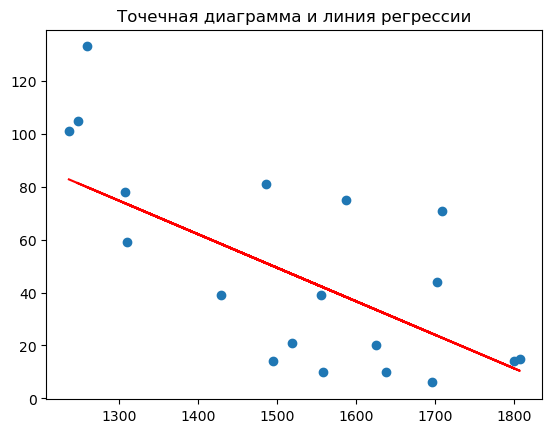

In [18]:
plt.scatter(X_test, y_test)
plt.plot(np.array(X_test), y_pred, c='r')
plt.title('Точечная диаграмма и линия регрессии', fontsize=12)
plt.show()

Построим график альтернативным способом

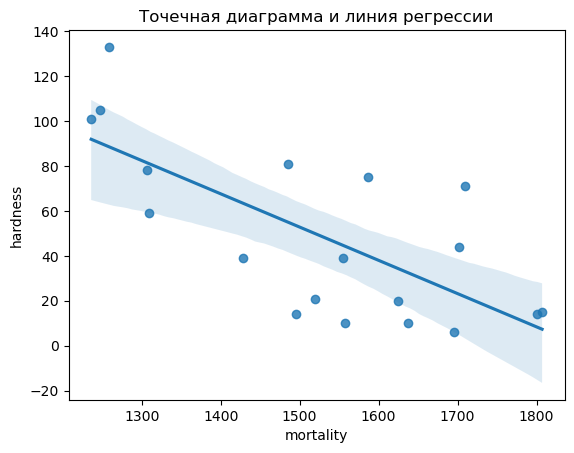

In [19]:
sns.regplot(x=X_test, y=y_test)
plt.title('Точечная диаграмма и линия регрессии', fontsize=12)
plt.show()

Данных мало и качество предсказания не велико. На графике видно что фактические значения зачастую расположены далековато от предсказанных

### Коэффициент детерминации

In [20]:
model.score(X_test, y_test)

0.4948982822876835

Посчитаем коэффициент детерминации подстановкой по формуле. Результат тот же.

In [21]:
ss_res = ((y_test - y_pred)**2).mean()
ss_tot = ((y_test - y_test.mean())**2).mean()
r2 = 1 - ss_res / ss_tot
r2

0.4948982822876835

Коэффициент должен стремиться к 1. В нашем случае $\approx$ 0.5. Модель, как минимум лучше предсказывает смертность чем по среднему значению

### График остатков

In [22]:
ostatki = (y_test - y_pred)

In [23]:
ostatki

1     23.629570
6    -31.966103
47   -35.948330
32    20.278987
14     4.231691
56   -13.477068
35    53.149994
50    36.708255
13   -25.907482
41   -18.481225
34   -14.514905
60    29.784650
17    -3.346209
4      2.695785
54    48.165901
18   -19.437365
9    -21.956644
7      4.582699
42    18.235848
Name: hardness, dtype: float64

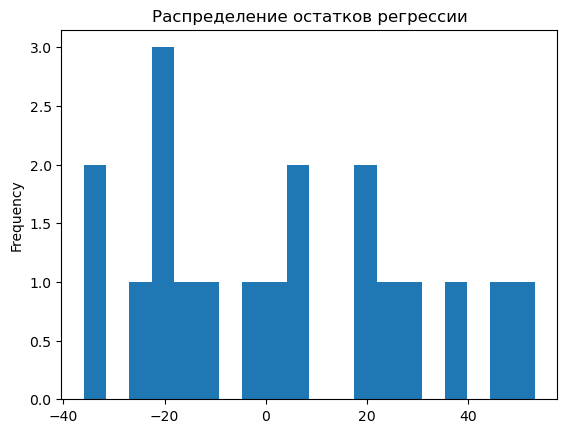

In [24]:
ostatki.plot(kind="hist", bins=20)
plt.title('Распределение остатков регрессии', fontsize=12)
plt.show()

На точечном графике факты расположены более или менее вокруг линии регрессии. На гистограмме же остатки (разница между фактами и предсказаниями) распределены не нормально. Скорее всего это потому что мало данных.

### 2. Разделить данные на 2 группы. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [25]:
def task(df):
    # вводные
    X = df[['mortality']]
    x = df['mortality']
    y = df['hardness']
    
    # точечный график
    sns.jointplot(x=x, y=y, kind="reg")
    plt.title('Точечная диаграмма, линия регрессии и распределения показателей', fontsize=12, loc='right', y=1.2)
    plt.show()
    
    # Пирсон и Спирман
    pearson = pearsonr(x, y)
    spearman = spearmanr(x, y)
    print('Корреляция по Пирсону:', pearson[0])
    print('Корреляция по Спирману:', spearman[0])
    
    # Модель регрессии
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print()
    print(f'Предсказанные значения {y_pred}')
    
    # Рисование графика предсказанных значений
    sns.regplot(x=X_test, y=y_test)
    plt.title('Точечная диаграмма и линия регрессии', fontsize=12)
    plt.show()
    
    # Рассчет R2
    print(f'Коэффициент детерминации - R2 {model.score(X_test, y_test)}')
    print()
    
    # Рассчет и график остатков
    ostatki.plot(kind="hist", bins=20)
    plt.title('Распределение остатков регрессии', fontsize=12)
    plt.show()

In [26]:
df['location'].value_counts(normalize=True)

North    0.57377
South    0.42623
Name: location, dtype: float64

Северных все же больше чем южных

******************************North******************************


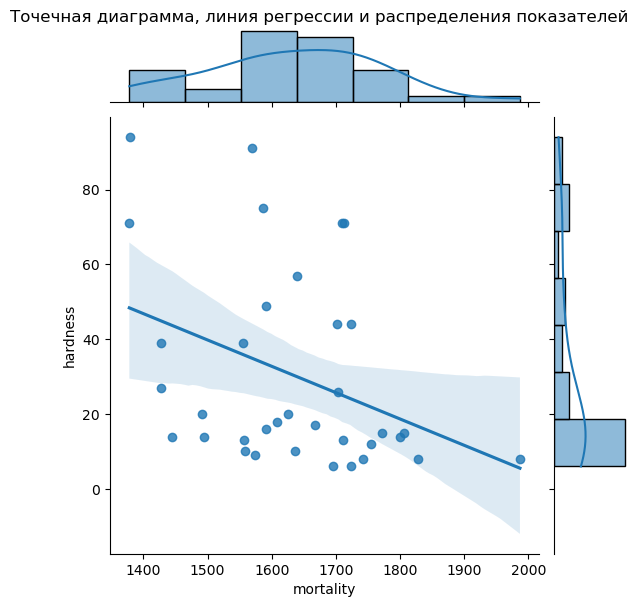

Корреляция по Пирсону: -0.36859783832887194
Корреляция по Спирману: -0.4042078956511175

Предсказанные значения [-2.48573411 37.88178607 50.58826942 23.22045913 36.22016902 24.29562311
 25.37078708 21.4610999  39.73888749 18.52883451 52.1521443 ]


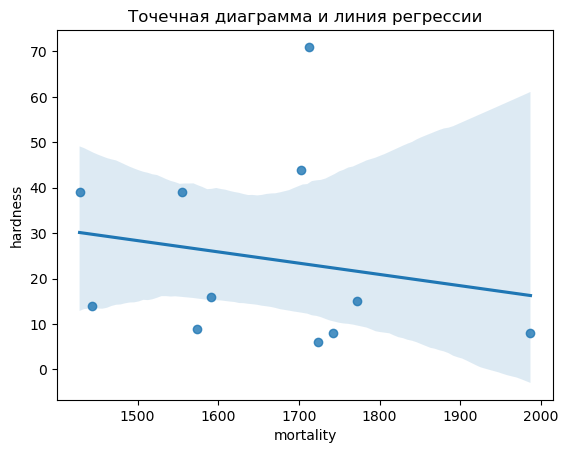

Коэффициент детерминации - R2 -0.34863672627416764



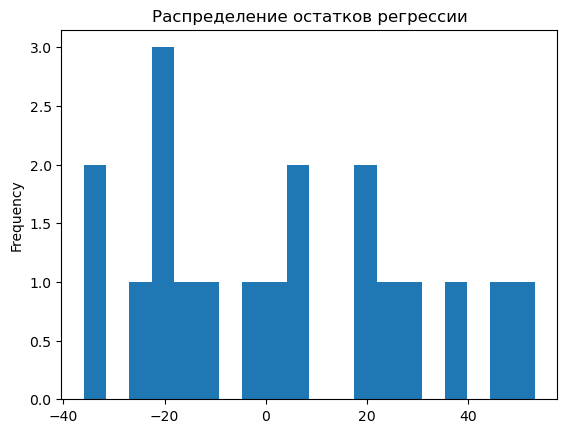

******************************South******************************


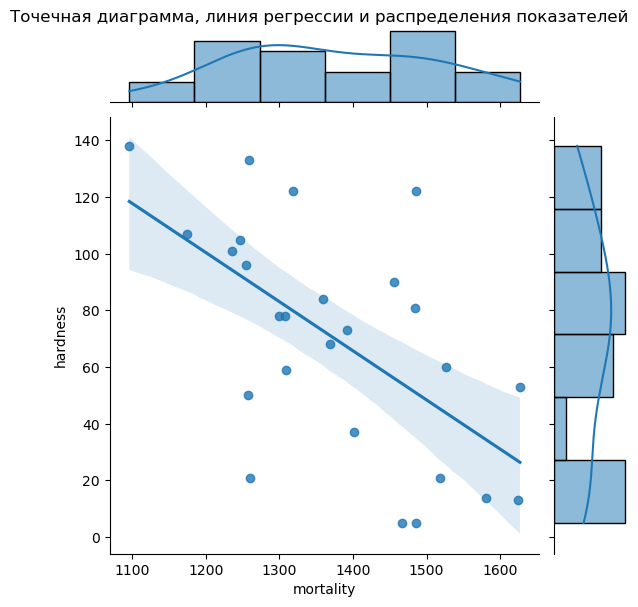

Корреляция по Пирсону: -0.6021532715484156
Корреляция по Спирману: -0.5957229185013566

Предсказанные значения [85.39221138 54.96268708 98.25230796 54.96268708 70.17744923 95.89764238
 87.02236446 58.58524949]


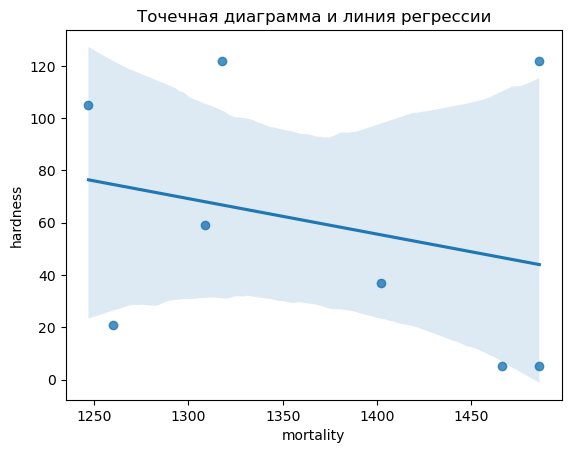

Коэффициент детерминации - R2 -0.05226615794483824



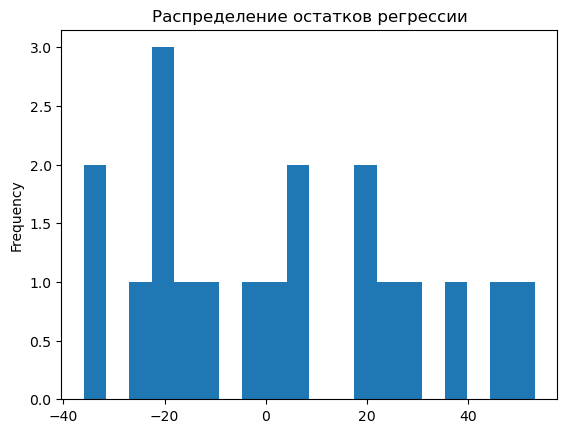

In [27]:
for i in df['location'].value_counts().index:
    print('*'*30 + i + '*'*30)
    task(df.query('location ==@i'))

Если делить данные, то наблюдений для каждой части становится очень мало. R2 модели становится ниже нуля, тот самый случай когда прогноз по средней лучше чем с помощью модели. Это же видно и на точечной диаграмме и на распределении остатков